<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [145]:
import pandas as pd

Load the dataset into a dataframe.


In [146]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


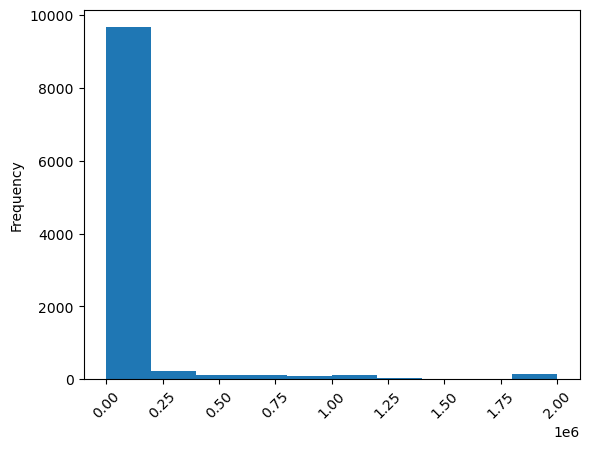

In [147]:
import matplotlib.pyplot as plt

df["ConvertedComp"].plot(kind="hist")
plt.xticks(rotation=45)
plt.show()

Plot the histogram for the column `ConvertedComp`.


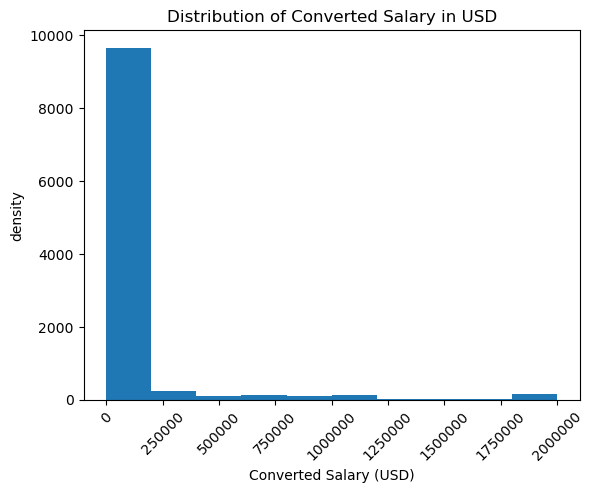

In [148]:
plt.hist(df["ConvertedComp"], bins=10)
plt.ticklabel_format(style='plain', axis='x')
plt.xticks(rotation=45)
plt.title("Distribution of Converted Salary in USD")
plt.xlabel("Converted Salary (USD)")
plt.ylabel("density")
plt.show()

What is the median of the column `ConvertedComp`?


In [149]:
df["ConvertedComp"].median()

57745.0

How many responders identified themselves only as a **Man**?


In [150]:
len(df[df["Gender"] == "Man"])


10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [151]:
df[df["Gender"] == "Woman"]["ConvertedComp"].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [152]:
df[["Age"]].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


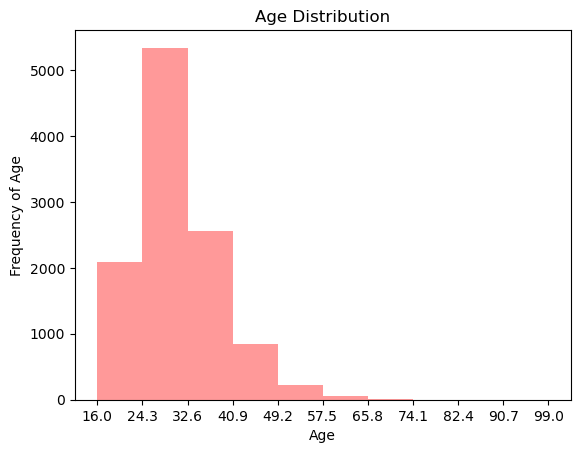

In [153]:
bin_edges = np.linspace(df["Age"].min(), df["Age"].max(), num=11)
plt.hist(df["Age"], bins=bin_edges, color="red", alpha=0.4)
plt.xticks(bin_edges)
plt.xlabel("Age")
plt.ylabel("Frequency of Age")
plt.title("Age Distribution")
plt.show()

Boxplot of column 'Age'

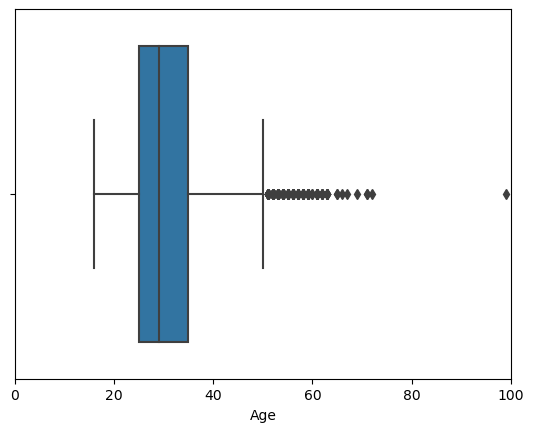

In [154]:
import seaborn as sns
sns.boxplot(df["Age"])
plt.xlim(0, 100)
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


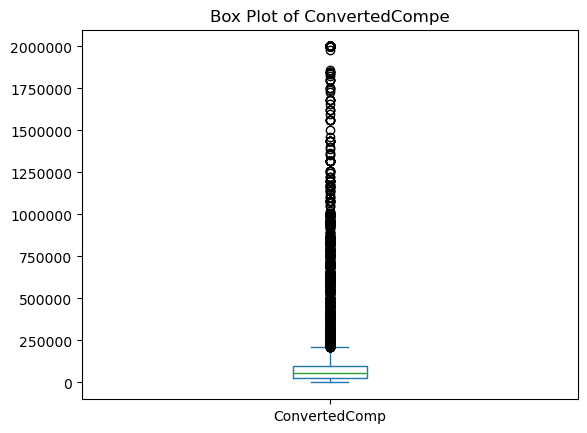

In [155]:
df["ConvertedComp"].plot(kind="box")
plt.ticklabel_format(style='plain', axis='y')
plt.title("Box Plot of ConvertedCompe")
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [156]:
q1 = df["ConvertedComp"].quantile(0.25)
q3 = df["ConvertedComp"].quantile(0.75)
iqr = q3 - q1
print("Inter Quartile Range :", iqr)

Inter Quartile Range : 73132.0


In [157]:
df["ConvertedComp"].median()

57745.0

In [158]:
df["ConvertedComp"].median()

57745.0

Find out the upper and lower bounds.


In [159]:
upper_bound = q3 + iqr * 1.5
lower_bound = q1 - iqr * 1.5
print("upper bound : ", upper_bound, "lower bound :", lower_bound)

upper bound :  209698.0 lower bound : -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [160]:
len(df[(df["ConvertedComp"] >= upper_bound) | (df["ConvertedComp"] <= lower_bound)])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [163]:
new_df = df.drop(df[(df["ConvertedComp"] >= upper_bound) | (df["ConvertedComp"] <= lower_bound)].index)

What is the median of ConvertedComp after removing outliers?

In [165]:
new_df["ConvertedComp"].median()

52704.0

What is the mean of ConvertedComp after removing outliers?

In [166]:
new_df["ConvertedComp"].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [168]:
new_df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.019364,0.010878,-0.015275,0.002980,0.003950
CompTotal,-0.019364,1.000000,-0.063561,0.004975,0.017536,0.006371
ConvertedComp,0.010878,-0.063561,1.000000,0.034351,-0.088934,0.401821
WorkWeekHrs,-0.015275,0.004975,0.034351,1.000000,0.031963,0.037452
CodeRevHrs,0.002980,0.017536,-0.088934,0.031963,1.000000,-0.017961
Age,0.003950,0.006371,0.401821,0.037452,-0.017961,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
